In [4]:
import pandas as pd 
import geopandas as gpd

import matplotlib.pyplot as plt

In [125]:
data_elektro=pd.read_excel(r'https://fragdenstaat.de/files/foi/493910/AuswertungGitterzellen.xlsx?download', skiprows=5)
data_elektro.head()

,Gitterzellen-ID_5km,Kategorien
0,5kmN2685E4340,8
1,5kmN2690E4340,5
2,5kmN2695E4330,8
3,5kmN2695E4335,5
4,5kmN2695E4340,2


In [124]:
##https://gdz.bkg.bund.de/index.php/default/geographische-gitter-fur-deutschland-in-utm-projektion-geogitter-national.html

#data_gitter=gpd.read_file(r'https://daten.gdz.bkg.bund.de/produkte/sonstige/geogitter/aktuell/DE_Grid_ETRS89-UTM32_5km.gpkg.zip')
data_gitter=gpd.read_file(r'https://daten.gdz.bkg.bund.de/produkte/sonstige/geogitter/aktuell/DE_Grid_ETRS89-LAEA_5km.gpkg.zip')
data_gitter.head(2)

,featuretype_name,dataset_name,OBJECTID,id,x_sw,y_sw,x_mp,y_mp,f_staat,f_land,f_wasser,p_staat,p_land,p_wasser,Shape_Length,Shape_Area,geometry
0,DE_Grid_ETRS89-LAEA_5km,de_grid_laea_5km,1,5kmN2680E4330,4330000.0,2680000.0,4332500.0,2682500.0,718558.0,718558.0,0.0,2.874232,2.874232,0.0,20000.0,25000000.0,"POLYGON ((4330000.000 2680000.000, 4330000.000..."
1,DE_Grid_ETRS89-LAEA_5km,de_grid_laea_5km,2,5kmN2680E4335,4335000.0,2680000.0,4337500.0,2682500.0,2021189.0,2021189.0,0.0,8.084756,8.084756,0.0,20000.0,25000000.0,"POLYGON ((4335000.000 2680000.000, 4335000.000..."


In [ ]:
#df_plot=gdf[gdf.Kategorien<6].copy()


In [126]:
#data_merge= pd.merge(data_elektro, data_gitter[['id','geometry']], left_on='Gitterzellen-ID_5km', right_on='id')
data_merge= pd.merge(data_gitter[['id','geometry']], data_elektro[data_elektro.Kategorien<6], right_on='Gitterzellen-ID_5km', left_on='id', how='left')

In [127]:
gdf = gpd.GeoDataFrame(data_merge, crs=data_gitter.crs, geometry='geometry')

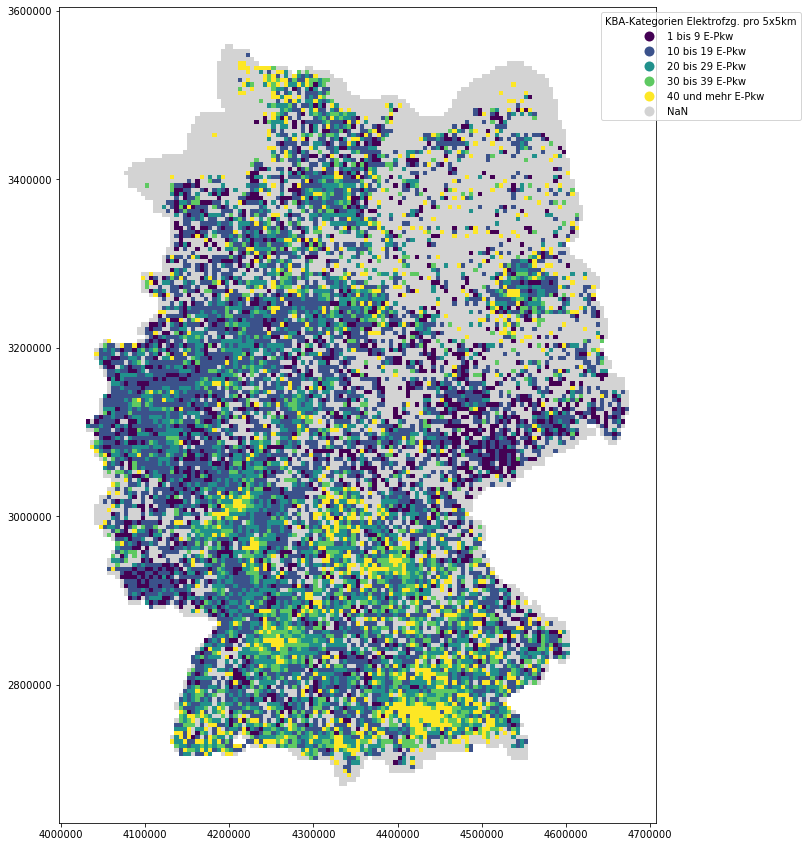

In [128]:
df_plot=gdf#[gdf.Kategorien<6].copy()


label_list=['1 bis 9 E-Pkw',
'10 bis 19 E-Pkw',
'20 bis 29 E-Pkw',
'30 bis 39 E-Pkw',
'40 und mehr E-Pkw']


ax=df_plot.plot(column='Kategorien', scheme='UserDefined', figsize=(15,15), legend=True,
            classification_kwds={
          #   'k':5
             'bins':[1,2,3,4,5]
         },
            legend_kwds = { 
                #'numpoints':1,
                'bbox_to_anchor':(1.25, 1),
                'title': "KBA-Kategorien Elektrofzg. pro 5x5km",
                'labels':label_list }
            ,
 missing_kwds={'color': 'lightgrey'}
               )

In [147]:
#bland=gpd.read_file(r"C:\Users\Simon\Analysen\geo_helper\nuts2500_01-01.utm32s.shape\nuts2500_2019-01-01.utm32s.shape\nuts2500\2500_NUTS1.shp")
#bland=gpd.read_file(r"https://daten.gdz.bkg.bund.de/produkte/vg/nuts2500/aktuell/nuts2500_01-01.utm32s.shape.zip") geht leider  nicht
#bland = bland.to_crs("EPSG:3857")
#bland.plot()

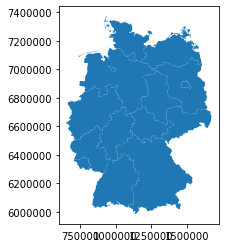

In [146]:
import requests, zipfile, io

# downlaod and unzip Nuts Shape
zip_file_url="https://daten.gdz.bkg.bund.de/produkte/vg/nuts2500/aktuell/nuts2500_01-01.utm32s.shape.zip"
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

# load Nuts Shape
bland=gpd.read_file(r"nuts2500_2019-01-01.utm32s.shape\nuts2500\2500_NUTS1.shp")
bland = bland.to_crs("EPSG:3857")
bland.plot()

Text(650733.341088516, 5875078.283882498, 'Quelle: Kraftfahrt-Bundesamt, 321-130/9236-20')

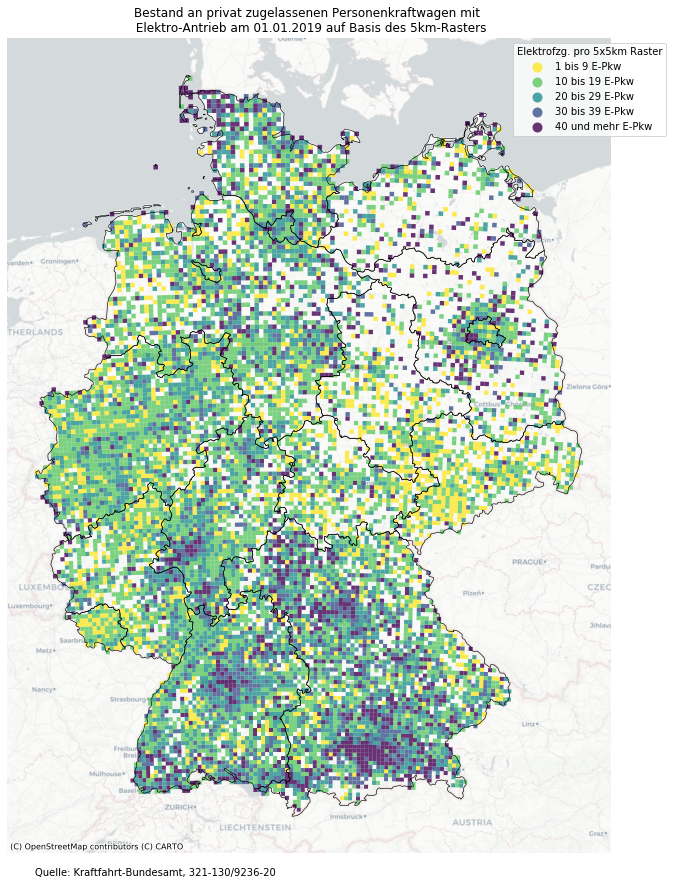

In [149]:

import contextily as ctx



df_plot=gdf[gdf.Kategorien<6].copy()

df_plot=df_plot.to_crs('EPSG:3857')


label_list=['1 bis 9 E-Pkw',
'10 bis 19 E-Pkw',
'20 bis 29 E-Pkw',
'30 bis 39 E-Pkw',
'40 und mehr E-Pkw']


ax=df_plot.plot(column='Kategorien', scheme='UserDefined', figsize=(15,15), legend=True, alpha=0.8, cmap='viridis_r',
            classification_kwds={
          #   'k':5
             'bins':[1,2,3,4,5]
         },
            legend_kwds = { 
                #'numpoints':1,
                'bbox_to_anchor':(1.1, 1),
                'title': "Elektrofzg. pro 5x5km Raster",#"KBA-Kategorien Elektrofzg. pro 5x5km",
                'labels':label_list }
            )
#adding bundslandgrenzen layer
fin_plot=bland.plot(facecolor="none", edgecolor='black', linewidths=0.6, figsize=(15,15), ax=ax)#, weight=1)

#adding basemap
ctx.add_basemap(fin_plot, source=ctx.providers.CartoDB.Positron)

#remove axis
fin_plot.set_axis_off()

#add title
fin_plot.set_title('Bestand an privat zugelassenen Personenkraftwagen mit \n Elektro-Antrieb am 01.01.2019 auf Basis des 5km-Rasters')

#Quelle
fin_plot.text(df_plot.total_bounds[0], df_plot.total_bounds[1]*0.98, "Quelle: Kraftfahrt-Bundesamt, 321-130/9236-20")
#fin_plot.annotate("Test", xy=(0.5, 0.5))


## Weiteres Zeugs
    * FZ1 (Fahrzeugbestand) einlesen [ab 2018, davor nur als PDF] und nach Kraftstoffen analysieren

In [ ]:
## Neuzulassungen pro Bundesland

In [5]:

# simplyfied shapes (QGIS: v.generalize: douglas 1000m & lang 1000m, dissovle by RS)
# Trier verschmolzen (07211)
#simp_shapes = gpd.read_file(r"https://github.com/vizsim/pkws_in_D/blob/master/input/kfz250.utm32s.shape/kfz250/KFZ250.shp")
simp_shapes = gpd.read_file(r"C:\Users\Simon\Documents\GitHub\pkws_in_D\input\kfz250.utm32s.shape\kfz250\KFZ250_simp.shp")
simp_shapes.head()



,RS,geometry
0,01001,"POLYGON ((529161.665 6067302.052, 524393.533 6..."
1,01002,"POLYGON ((576967.613 6012251.045, 573187.013 6..."
2,01003,"POLYGON ((608039.127 5958968.208, 604500.498 5..."
3,01004,"POLYGON ((561869.142 5986355.578, 562659.983 5..."
4,01051,"MULTIPOLYGON (((513041.664 5971238.145, 501934..."


In [6]:
#kba_data= pd.read_excel(r"input\fz1_2019_xlsx.xlsx", sheet_name='Pkw', skiprows=8, nrows=444)
kba_data= pd.read_excel(r"https://www.kba.de/SharedDocs/Publikationen/DE/Statistik/Fahrzeuge/FZ/2020/fz1_2020_xlsx.xlsx?__blob=publicationFile&v=7", sheet_name='FZ1.2', skiprows=8, nrows=444)


hybridname_2020='darunter\nPlug-in-Hybrid'
#hybridname='darunter Hybrid mit \nPlug-in'

kba_data= kba_data[['Unnamed: 3', 'Unnamed: 4',
       'Benzin', 'Diesel', 'Gas\n(einschl.\nbivalent)', 'Hybrid \ninsgesamt',
       hybridname_2020, 'Elektro', 'sonstige']].copy()

kba_data=kba_data.rename(columns={'Unnamed: 3':'Zulassungsbezirk', 
                                  'Unnamed: 4': 'Insgesamt', 
                                  'Gas\n(einschl.\nbivalent)': 'Gas', 
                                  'Hybrid \ninsgesamt': 'HEV', 
                                  hybridname_2020: 'PHEV', 
                                  'Elektro': 'BEV'})
kba_data['Jahr']=2020
kba_data_2020=kba_data.copy()

In [7]:
kba_data

,Zulassungsbezirk,Insgesamt,Benzin,Diesel,Gas,HEV,PHEV,BEV,sonstige,Jahr
0,"08111 STUTTGART,STADT",307367,207228,86990,2235,8136,2597,2712,66,2020
1,08115 BOEBLINGEN,256970,167960,79564,1444,6011,1551,1930,61,2020
2,08116 ESSLINGEN,333419,225817,99591,1977,4648,920,1319,67,2020
3,08117 GOEPPINGEN,166215,109504,53058,1293,1852,305,471,37,2020
4,08118 LUDWIGSBURG,333240,233532,91756,2189,4368,1022,1323,72,2020
...,...,...,...,...,...,...,...,...,...,...
439,16073 SAALFELD-RUDOLSTADT,60346,41494,17905,397,475,62,58,17,2020
440,16074 SAALE-HOLZLANDKREIS,49469,33440,15042,406,504,84,59,18,2020
441,16075 SAALE-ORLA-KREIS,50471,33577,16244,344,240,42,48,18,2020
442,16076 GREIZ,60296,41185,18136,435,475,50,47,18,2020


In [8]:
#kba_data= pd.read_excel(r"input\fz1_2019_xlsx.xlsx", sheet_name='Pkw', skiprows=8, nrows=444)
kba_data= pd.read_excel(r"https://www.kba.de/SharedDocs/Publikationen/DE/Statistik/Fahrzeuge/FZ/2019/fz1_2019_xlsx.xlsx?__blob=publicationFile&v=10", sheet_name='Pkw', skiprows=8, nrows=444)


#hybridname_2020='darunter\nPlug-in-Hybrid'
hybridname='darunter Hybrid mit \nPlug-in'

kba_data= kba_data[['Unnamed: 3', 'Unnamed: 4',
       'Benzin', 'Diesel', 'Gas\n(einschl.\nbivalent)', 'Hybrid \ninsgesamt',
       hybridname, 'Elektro', 'sonstige']].copy()

kba_data=kba_data.rename(columns={'Unnamed: 3':'Zulassungsbezirk', 
                                  'Unnamed: 4': 'Insgesamt', 
                                  'Gas\n(einschl.\nbivalent)': 'Gas', 
                                  'Hybrid \ninsgesamt': 'HEV', 
                                  hybridname: 'PHEV', 
                                  'Elektro': 'BEV'})
kba_data['Jahr']=2019
kba_data_2019=kba_data.copy()

In [9]:
kba_data

,Zulassungsbezirk,Insgesamt,Benzin,Diesel,Gas,HEV,PHEV,BEV,sonstige,Jahr
0,"08111 STUTTGART,STADT",301793,196371,96958,1978,4817,1775,1590,79,2019
1,08115 BOEBLINGEN,253000,164557,82438,1448,3220,1003,1253,84,2019
2,08116 ESSLINGEN,329698,219852,104219,1937,2716,568,906,68,2019
3,08117 GOEPPINGEN,163772,106944,54041,1264,1175,196,308,40,2019
4,08118 LUDWIGSBURG,329497,226185,97531,2206,2627,655,875,73,2019
...,...,...,...,...,...,...,...,...,...,...
439,16073 SAALFELD-RUDOLSTADT,60204,41610,17795,434,308,36,39,18,2019
440,16074 SAALE-HOLZLANDKREIS,49320,33522,14962,449,333,51,35,19,2019
441,16075 SAALE-ORLA-KREIS,50304,33773,15944,393,143,28,32,19,2019
442,16076 GREIZ,60390,41612,17927,482,315,33,35,19,2019


In [10]:
#kba_data= pd.read_excel(r"input\fz1_2019_xlsx.xlsx", sheet_name='Pkw', skiprows=8, nrows=444)
kba_data= pd.read_excel(r"https://www.kba.de/SharedDocs/Publikationen/DE/Statistik/Fahrzeuge/FZ/2018/fz1_2018_xls.xls?__blob=publicationFile&v=3", sheet_name='Pkw', skiprows=8, nrows=444)


#hybridname_2020='darunter\nPlug-in-Hybrid'
hybridname='Hybrid mit Plug-in'

kba_data= kba_data[['Statistische Kennziffer und Zulassungsbezirk', 'Insgesamt',
       'Benzin', 'Diesel', 'Gas\n(einschl.\nbivalent)', 'Hybrid insgesamt',
       hybridname, 'Elektro', 'sonstige']].copy()

kba_data=kba_data.rename(columns={'Statistische Kennziffer und Zulassungsbezirk':'Zulassungsbezirk', 
                                  'Insgesamt': 'Insgesamt', 
                                  'Gas\n(einschl.\nbivalent)': 'Gas', 
                                  'Hybrid insgesamt': 'HEV', 
                                  hybridname: 'PHEV', 
                                  'Elektro': 'BEV'})

kba_data['Jahr']=2018
kba_data_2018=kba_data.copy()

In [11]:
kba_data_all=kba_data_2018.append(kba_data_2019)
kba_data_all=kba_data_all.append(kba_data_2020)

In [12]:
kba_data_all['RS']=kba_data_all.Zulassungsbezirk.str[:5]

In [13]:
kba_data_all[kba_data_all.RS=='08111']

,Zulassungsbezirk,Insgesamt,Benzin,Diesel,Gas,HEV,PHEV,BEV,sonstige,Jahr,RS
0,"08111 STUTTGART,STADT",301508,189027,106608,1894,2718,1168,1193,68,2018,08111
0,"08111 STUTTGART,STADT",301793,196371,96958,1978,4817,1775,1590,79,2019,08111
0,"08111 STUTTGART,STADT",307367,207228,86990,2235,8136,2597,2712,66,2020,08111


In [14]:
kba_data_all['BL']=kba_data_all.Zulassungsbezirk.str[:2]

In [15]:
kba_data_all=kba_data_all[kba_data_all['BL']!=' ']
kba_data_all=kba_data_all[kba_data_all['BL'].notna()]

In [16]:
kba_data_all.head()

,Zulassungsbezirk,Insgesamt,Benzin,Diesel,Gas,HEV,PHEV,BEV,sonstige,Jahr,RS,BL
0,"08111 STUTTGART,STADT",301508,189027,106608,1894,2718,1168,1193,68,2018,08111,08
1,08115 BOEBLINGEN,248281,159719,84350,1429,1837,749,869,77,2018,08115,08
2,08116 ESSLINGEN,324901,213997,106569,1896,1830,346,534,75,2018,08116,08
3,08117 GOEPPINGEN,161062,104146,54545,1285,848,130,196,42,2018,08117,08
4,08118 LUDWIGSBURG,324853,219028,101142,2184,1797,421,625,77,2018,08118,08


In [17]:
kba_data_all['BL'].value_counts()

09    288
05    159
03    135
08    132
07    105
06     78
16     69
12     54
01     45
15     42
14     39
13     24
10     18
04      6
02      3
11      3
Name: BL, dtype: int64

In [18]:
kba_data_all['BL'].unique()

array(['08', '09', '11', '12', '04', '02', '06', '13', '03', '05', '07',
       '10', '14', '15', '01', '16'], dtype=object)

In [19]:
kba_data_all[kba_data_all['BL'].isna()]

,Zulassungsbezirk,Insgesamt,Benzin,Diesel,Gas,HEV,PHEV,BEV,sonstige,Jahr,RS,BL


In [20]:
kba_data_all.sort_values('BL')

,Zulassungsbezirk,Insgesamt,Benzin,Diesel,Gas,HEV,PHEV,BEV,sonstige,Jahr,RS,BL
415,01058 RENDSBURG-ECKERNFOERDE,168477,101773,64345,1522,680,93,140,17,2018,01058,01
406,"01002 KIEL,STADT",109052,71250,36159,811,687,131,128,17,2018,01002,01
405,"01001 FLENSBURG,STADT",43075,26386,16028,363,219,48,64,15,2018,01001,01
416,01059 SCHLESWIG-FLENSBURG,123328,70565,51050,1190,346,68,153,24,2018,01059,01
417,01060 SEGEBERG,162312,104553,55248,1519,795,131,169,28,2018,01060,01
...,...,...,...,...,...,...,...,...,...,...,...,...
439,16073 SAALFELD-RUDOLSTADT,60204,41610,17795,434,308,36,39,18,2019,16073,16
440,16074 SAALE-HOLZLANDKREIS,49320,33522,14962,449,333,51,35,19,2019,16074,16
441,16075 SAALE-ORLA-KREIS,50304,33773,15944,393,143,28,32,19,2019,16075,16
432,16066 SCHMALKALDEN-MEININGEN,76045,50153,24928,508,354,50,73,29,2019,16066,16


In [21]:
bland_dict={'01': 'Schleswig-Holstein',
            '02': 'Hamburg',
            '03': 'Niedersachsen',
            '04': 'Bremen',
            '05': 'Nordrhein-Westfalen',
            '06': 'Hessen',
            '07': 'Rheinland-Pfalz',
            '08': 'Baden-Württemberg',
            '09': 'Bayern',
            '10': 'Saarland',
            '11': 'Berlin',
            '12': 'Brandenburg',
            '13': 'Mecklenburg-Vorpommern',
            '14': 'Sachsen',
            '15': 'Sachsen-Anhalt',
            '16': 'Thüringen'}

In [22]:
kba_data_all['BL_name']=kba_data_all.BL.apply(lambda x: bland_dict[x])

In [23]:
kba_data_all.groupby(['BL_name','Jahr']).BEV.sum()

BL_name                 Jahr
Baden-Württemberg       2018    10568
                        2019    15998
                        2020    24863
Bayern                  2018    12953
                        2019    20063
                        2020    30571
Berlin                  2018     2007
                        2019     2713
                        2020     4886
Brandenburg             2018      967
                        2019     1699
                        2020     2521
Bremen                  2018      307
                        2019      446
                        2020      752
Hamburg                 2018     1387
                        2019     2233
                        2020     3395
Hessen                  2018     4139
                        2019     6618
                        2020    10670
Mecklenburg-Vorpommern  2018      418
                        2019      626
                        2020     1003
Niedersachsen           2018     4757
                     

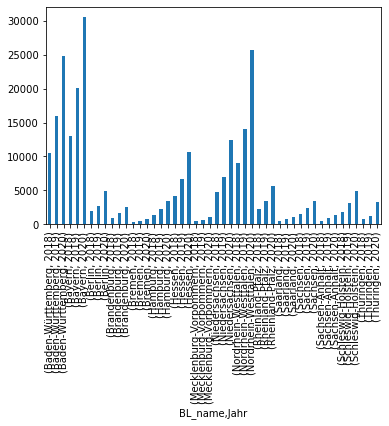

In [24]:
kba_data_all.groupby(['BL_name','Jahr']).BEV.sum().plot(kind='bar')

In [67]:
import altair as alt

source = kba_data_all.groupby(['BL_name','Jahr']).BEV.sum().reset_index()

source

alt.Chart(source).mark_line().encode(
    x='Jahr:O',
    y='BEV',
    color='BL_name',
    #strokeDash='BL_name',
).properties(width=500)

alt.Chart(...)

In [66]:
import altair as alt


source = kba_data_all.groupby(['BL_name','Jahr']).BEV.sum().reset_index()

#source.BEV

for index,row in source.iterrows():
    if row['Jahr']==2018:
        bev_18=row['BEV']
    
    source.at[index, 'BEV_rel'] = row['BEV']/bev_18
    
alt.Chart(source).mark_line(point=True).encode(
    x='Jahr:O',
    y='BEV_rel',
    color='BL_name',
    tooltip=['BL_name','BEV_rel','BEV']
    #strokeDash='BL_name',
).properties(width=500,
            title='Entwicklung BEV, Basisjahr 2018 (100%) je Bundesland').interactive()

alt.Chart(...)

In [121]:
import altair as alt


source = kba_data_all.groupby(['BL_name','Jahr']).Diesel.sum().reset_index()

#source.BEV



for index,row in source.iterrows():
    if row['Jahr']==2018:
        Diesel_18=row['Diesel']
    
    source.at[index, 'Diesel_rel'] = row['Diesel']/Diesel_18

order=list(source[source.Jahr==2020].sort_values('Diesel_rel', ascending=False)['BL_name'])    

alt.Chart(source).mark_line(point=True).encode(
    x='Jahr:O',
    #y='Diesel_rel',
    y=alt.Y('Diesel_rel:Q', 
            axis=alt.Axis(format='%'),
           scale=alt.Scale(domain=(source.Diesel_rel.min(), source.Diesel_rel.max()))),
    color=alt.Color('BL_name',
                    scale=alt.Scale(domain=order)),
    tooltip=['BL_name','Diesel_rel','Diesel']
    #strokeDash='BL_name',
).properties(width=500,
            title='Entwicklung Diesel, Basisjahr 2018 (100%) je Bundesland').interactive()

alt.Chart(...)

In [123]:
source[source.Jahr==2020].sort_values('Diesel_rel', ascending=False)

,BL_name,Jahr,Diesel,Diesel_rel
23,Mecklenburg-Vorpommern,2020,281270,1.047818
26,Niedersachsen,2020,1649799,1.029822
38,Sachsen,2020,584260,1.029509
11,Brandenburg,2020,401723,1.026891
41,Sachsen-Anhalt,2020,339142,1.024954
47,Thüringen,2020,359051,1.023025
44,Schleswig-Holstein,2020,580492,1.019718
5,Bayern,2020,2868680,1.003590
32,Rheinland-Pfalz,2020,833761,1.001249
35,Saarland,2020,196196,0.995277


In [120]:
import altair as alt

kraftstoff='HEV' #kraftstoffe=['Benzin', 'Diesel', 'Gas', 'HEV', 'PHEV', 'BEV']
source = kba_data_all.groupby(['BL_name','Jahr'])[kraftstoff].sum().reset_index()



for index,row in source.iterrows():
    if row['Jahr']==2018:
        kraftstoff_18=row[kraftstoff]
    
    source.at[index, kraftstoff+'_rel'] = row[kraftstoff]/kraftstoff_18

order=list(source[source.Jahr==2020].sort_values(kraftstoff+'_rel', ascending=False)['BL_name'])    

alt.Chart(source).mark_line(point=True).encode(
    x='Jahr:O',
    #y='Diesel_rel',
    y=alt.Y(kraftstoff+'_rel:Q',
            axis=alt.Axis(format='%'),
           scale=alt.Scale(domain=(source[kraftstoff+'_rel'].min(), source[kraftstoff+'_rel'].max()))),
    color=alt.Color('BL_name',
                    scale=alt.Scale(domain=order)),
    tooltip=['BL_name',kraftstoff+'_rel',kraftstoff]
    #strokeDash='BL_name',
).properties(width=500,
            title='Entwicklung '+kraftstoff+', Basisjahr 2018 (100%) je Bundesland').interactive()

alt.Chart(...)

In [116]:
kba_data_all.columns

Index(['Zulassungsbezirk', 'Insgesamt', 'Benzin', 'Diesel', 'Gas', 'HEV',
       'PHEV', 'BEV', 'sonstige', 'Jahr', 'RS', 'BL', 'BL_name'],
      dtype='object')

In [117]:
kraftstoffe=['Benzin', 'Diesel', 'Gas', 'HEV', 'PHEV', 'BEV']

In [ ]:
import altair as alt

#kraftstoff='BEV'
kraftstoffe=['Benzin', 'Diesel', 'Gas', 'HEV', 'PHEV', 'BEV']
source = kba_data_all.groupby(['BL_name','Jahr'])[kraftstoff].sum().reset_index()



for index,row in source.iterrows():
    if row['Jahr']==2018:
        kraftstoff_18=row[kraftstoff]
    
    source.at[index, kraftstoff+'_rel'] = row[kraftstoff]/kraftstoff_18

order=list(source[source.Jahr==2020].sort_values(kraftstoff+'_rel', ascending=False)['BL_name'])    

alt.Chart(source).mark_line(point=True).encode(
    x='Jahr:O',
    #y='Diesel_rel',
    y=alt.Y(kraftstoff+'_rel:Q',
            axis=alt.Axis(format='%'),
           scale=alt.Scale(domain=(source[kraftstoff+'_rel'].min(), source[kraftstoff+'_rel'].max()))),
    color=alt.Color('BL_name',
                    scale=alt.Scale(domain=order)),
    tooltip=['BL_name',kraftstoff+'_rel',kraftstoff]
    #strokeDash='BL_name',
).properties(width=500,
            title='Entwicklung '+kraftstoff+', Basisjahr 2018 (100%) je Bundesland').interactive()

In [95]:
list(source[source.Jahr==2020].sort_values('Diesel_rel')['BL_name'])

['Berlin',
 'Hamburg',
 'Hessen',
 'Nordrhein-Westfalen',
 'Baden-Württemberg',
 'Bremen',
 'Saarland',
 'Rheinland-Pfalz',
 'Bayern',
 'Schleswig-Holstein',
 'Thüringen',
 'Sachsen-Anhalt',
 'Brandenburg',
 'Sachsen',
 'Niedersachsen',
 'Mecklenburg-Vorpommern']

In [84]:
import altair as alt

kraftstoff='Diesel'
source = kba_data_all.groupby(['BL_name','Jahr'])[kraftstoff,'Insgesamt'].sum().reset_index()

source[kraftstoff + '_anteil']=source[kraftstoff]/source.Insgesamt

alt.Chart(source).mark_line(point=True).encode(
    x='Jahr:O',
    y= kraftstoff+'_anteil',
    color='BL_name',
    tooltip=['BL_name',kraftstoff,kraftstoff+'_anteil']
    #strokeDash='BL_name',
).properties(width=500,
            title=kraftstoff+'_anteil je Bundesland')

alt.Chart(...)

In [85]:
import altair as alt

kraftstoff='BEV'
source = kba_data_all.groupby(['BL_name','Jahr'])[kraftstoff,'Insgesamt'].sum().reset_index()

source[kraftstoff + '_anteil']=source[kraftstoff]/source.Insgesamt

alt.Chart(source).mark_line(point=True).encode(
    x='Jahr:O',
    y= kraftstoff+'_anteil',
    color='BL_name',
    tooltip=['BL_name',kraftstoff,kraftstoff+'_anteil']
    #strokeDash='BL_name',
).properties(width=500,
            title=kraftstoff+'_anteil je Bundesland')

alt.Chart(...)

In [86]:
import altair as alt

kraftstoff='PHEV'
source = kba_data_all.groupby(['BL_name','Jahr'])[kraftstoff,'Insgesamt'].sum().reset_index()

source[kraftstoff + '_anteil']=source[kraftstoff]/source.Insgesamt

alt.Chart(source).mark_line(point=True).encode(
    x='Jahr:O',
    y= kraftstoff+'_anteil',
    color='BL_name',
    tooltip=['BL_name',kraftstoff,kraftstoff+'_anteil']
    #strokeDash='BL_name',
).properties(width=500,
            title=kraftstoff+'_anteil je Bundesland')

alt.Chart(...)

In [77]:
kba_data_all

,Zulassungsbezirk,Insgesamt,Benzin,Diesel,Gas,HEV,PHEV,BEV,sonstige,Jahr,RS,BL,BL_name
0,"08111 STUTTGART,STADT",301508,189027,106608,1894,2718,1168,1193,68,2018,08111,08,Baden-Württemberg
1,08115 BOEBLINGEN,248281,159719,84350,1429,1837,749,869,77,2018,08115,08,Baden-Württemberg
2,08116 ESSLINGEN,324901,213997,106569,1896,1830,346,534,75,2018,08116,08,Baden-Württemberg
3,08117 GOEPPINGEN,161062,104146,54545,1285,848,130,196,42,2018,08117,08,Baden-Württemberg
4,08118 LUDWIGSBURG,324853,219028,101142,2184,1797,421,625,77,2018,08118,08,Baden-Württemberg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,16073 SAALFELD-RUDOLSTADT,60346,41494,17905,397,475,62,58,17,2020,16073,16,Thüringen
440,16074 SAALE-HOLZLANDKREIS,49469,33440,15042,406,504,84,59,18,2020,16074,16,Thüringen
441,16075 SAALE-ORLA-KREIS,50471,33577,16244,344,240,42,48,18,2020,16075,16,Thüringen
442,16076 GREIZ,60296,41185,18136,435,475,50,47,18,2020,16076,16,Thüringen
